<a href="https://colab.research.google.com/github/ramtiin/Name-Nationality-Classification-with-Machine-Learning/blob/main/Name_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import os 
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

In [2]:
!unzip names.zip

Archive:  names.zip
  inflating: names.csv               


Loading dataset:

In [3]:
df = pd.read_csv("names.csv",low_memory=False)

In [4]:
df.head()

,Country,Full Name
0,BR,Hellen Almeida
1,BR,Rafael Lima Lima
2,BR,Gabriel Azevedo
3,BR,Jaison Rodrigues
4,BR,Adriano Manoel


We approximately have 100,000 names for each country:

In [5]:
df.groupby('Country')['Full Name'].size()

Country
BR    99864
CZ    99922
DE    99757
DZ    99905
ES    99706
FR    99883
ID    98794
IN    98667
IQ    99569
IR    99877
JP    97331
MA    97252
MX    99659
PH    98939
RU    99832
TR    99945
US    99393
Name: Full Name, dtype: int64

We encode each country with value between 0 and n_classes-1:

In [6]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Country'])

In [15]:
y

array([ 0,  0,  0, ..., 16, 16, 16])

Splitting arrays into random train and test subsets and converting the names to a matrix of token counts:

In [17]:
x_train, x_test, y_train, y_test = train_test_split(df['Full Name'], y, test_size=0.2,random_state=0)
vectorizer = CountVectorizer().fit(x_train)

In [18]:
transformed_x_train = vectorizer.transform(x_train)

The multinomial Naive Bayes classifier is suitable for classification with discrete features (e.g., word counts for text classification)

In [19]:
from sklearn.naive_bayes import MultinomialNB

# instantiate the model as clf(classifier) and train it
clf = MultinomialNB()
clf.fit(transformed_x_train, y_train)

MultinomialNB()

Some functions which help us to review the results:


In [20]:
def predict(names, label_str=False):
        '''Predict name's origin based on the test data. Returns encoded label by default,
        but returns label strings when label_str=True
        
        Param:
            names(ndarray/Pandas Series/list): containing names
            label_str(bool): default False, to return label integers, set it to True to return label strings
        Return:
            array: containing label integers or strings.
        '''

        name_vector = vectorizer.transform(names)
        pred = clf.predict(name_vector)
        if not label_str:
            return pred
        else:
            return label_encoder.inverse_transform(pred.ravel()).ravel()
def evaluate(labels, prediction):
        '''make prediction, and evaluate the model's 
        - accuracy
        - precision: each element in returned vector represents precision for each class.
        - recall: same as above, except recall for each class.
        for each class and overall.

        You can take average to get model wise precision and recall.

        Params:
            names(list/Pandas Series/ndarray): names data
            labels(ndarray): ground truth
        '''
        cm = confusion_matrix(labels, prediction)
        # recall
        recall = np.diag(cm) / np.sum(cm, axis = 1)
        # precision
        precision = np.diag(cm) / np.sum(cm, axis = 0)

        acc = (prediction == labels).mean()

        return {'accuracy':acc, 'precision':precision, 'recall':recall}

def plot_confusion( yt, prediction_test):
        '''Plot confusion matrix, based on given labels and prediction

        Param:
            yt(ndarray): array of gruond truth labels
            prediction_test(ndarray): predicted labels
        '''

        cm = confusion_matrix(yt, prediction_test)
        fig = plt.figure(figsize=(15, 10))
        plt.imshow(cm, interpolation='nearest')
        plt.colorbar()
        axis_font = {'size': 13, 'color':'black'}
        cat = label_encoder.classes_
        num_class = len(cat)
        classNames = [cat[i] for i in range(num_class)]
        plt.title("Confusion Matrix by class", fontdict=axis_font)
        plt.ylabel("True Label", fontdict=axis_font)
        plt.xlabel("Predicted Label", fontdict=axis_font)
        tick_marks = np.arange(len(classNames))
        plt.xticks(tick_marks, classNames, rotation=45)
        plt.yticks(tick_marks, classNames)
        fdic = {'size':10, 'color':'white', 'weight':'heavy'}
        for i in range(num_class):
            for j in range(num_class):
                plt.text(j, i, str(cm[i, j]), fontdict=fdic, horizontalalignment='center',verticalalignment='center')
        plt.show()

Testing on a single first name (Although the model is trained on full names):

In [21]:
predict(["Ramtin"],True)

array(['IR'], dtype=object)

Correctly predicted!

Now we want to predict the test set from the dataset and evaluate the results:

In [22]:
y_pred = predict(x_test)

In [23]:
evaluate(y_pred,y_test)

{'accuracy': 0.7230608394859903,
 'precision': array([0.85579184, 0.87334204, 0.62353059, 0.57203815, 0.68339361,
        0.57670242, 0.70702511, 0.85300353, 0.83383504, 0.8726838 ,
        0.67181091, 0.760817  , 0.70896122, 0.56150543, 0.8671143 ,
        0.86546928, 0.40113223]),
 'recall': array([0.78199442, 0.58542417, 0.70920574, 0.65851826, 0.59691997,
        0.73644645, 0.80904289, 0.8310628 , 0.79842429, 0.81182522,
        0.89336606, 0.67138836, 0.56653153, 0.66704675, 0.91546315,
        0.83068427, 0.53730535])}

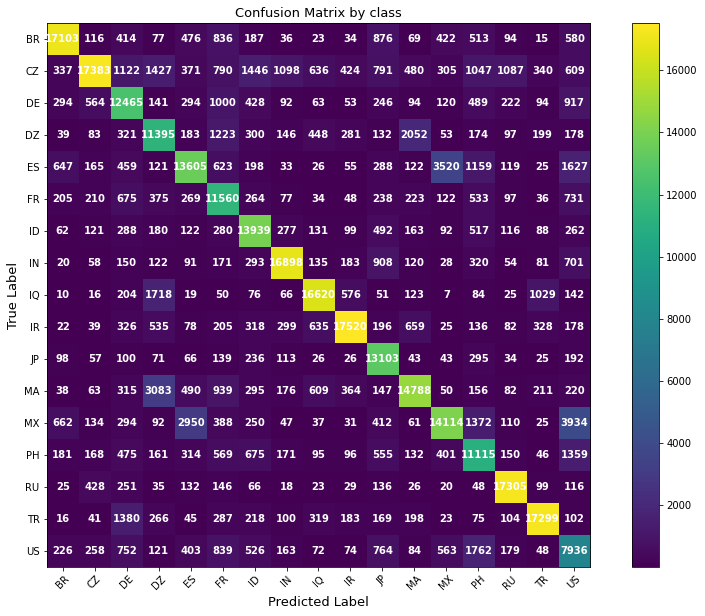

In [24]:
plot_confusion(y_pred,y_test)